# Data Science CSE558 Assignment - 2
## Ritika Thakur (2022408) | Saksham Singh (2022434)

In [5]:
import random
import hashlib
import pandas as pd
import matplotlib.pyplot as plt

### Universal Hash Table
$ h_{a}(x) = ((a*x) \mod p) \mod m $

In [6]:
class HashTable:
    def __init__(self, m, p=524287):
        # m: size of hash table
        # p: prime number
        # A: hash table
        # a: random number in [1, p-1]
        self.m = m
        self.p = p
        self.A = [[] for _ in range(m)]
        self.a = random.randint(1, p-1)


    def hash(self, x):
        return ((self.a * x) % self.p) % self.m
    
    def insert(self, x):
        i = self.hash(x)
        if x not in self.A[i]:
            self.A[i].append(x)

    def delete(self, x):
        i = self.hash(x)
        if x in self.A[i]:
            self.A[i].remove(x)

    def search(self, x):
        i = self.hash(x)
        return x in self.A[i]
    
    def __str__(self):
        return "\n".join([f"Index {i}: {self.A[i]}" for i in range(self.m)])


In [7]:
# read word.txt
with open("words.txt") as f:
    words = f.read().splitlines()

words = pd.Series(words)
words

0               &c
1               'd
2              'em
3              'll
4               'm
            ...   
354981     zymurgy
354982      zythem
354983      zythum
354984     zyzzyva
354985    zyzzyvas
Length: 354986, dtype: object

### Md5 Hash Table
Using the hashlib library: It works by taking the input string and converting it into a fixed 128-bit length hash value.

In [8]:
def md5_hash(x):
    md5_ = hashlib.md5(x.encode()).hexdigest()
    return int(md5_[-4:], 16) % 65536

In [9]:
results = []
result_path = "result.txt"
with open(result_path, "w") as f:
    f.write("")

for word in words:
    hash_string = md5_hash(word)
    results.append(hash_string)
    with open(result_path, "a") as f:
        f.write(f"{word}: {hash_string}\n")

results = pd.Series(results)
results.index = words
results

&c          24484
'd            349
'em         14811
'll         30807
'm           5815
            ...  
zymurgy      3118
zythem      56354
zythum      30782
zyzzyva     26679
zyzzyvas    38203
Length: 354986, dtype: int64

### Random Hash Function
$ h(x) = random.random() * m $

In [10]:
def random_hash(m):
    return int(random.random() * m)

In [11]:
univ, rand = [], []
m = 500000

for _ in range(5):
    h = HashTable(m)
    univ_hash_dict = {}
    random_hash_dict = {}

    for i in range(m):
        univ_index = h.hash(i)
        random_index = random_hash(m)

        if univ_index not in univ_hash_dict:
            univ_hash_dict[univ_index] = 1
        else:
            univ_hash_dict[univ_index] += 1

        if random_index not in random_hash_dict:
            random_hash_dict[random_index] = 1
        else:
            random_hash_dict[random_index] += 1

    # find the index with the most number of collisions
    univ_max_index = max(univ_hash_dict, key=univ_hash_dict.get)
    random_max_index = max(random_hash_dict, key=random_hash_dict.get)

    univ_min_index = min(univ_hash_dict, key=univ_hash_dict.get)
    random_min_index = min(random_hash_dict, key=random_hash_dict.get)

    print(f"Universal Hashing: Index {univ_max_index} has the most number of collisions: {univ_hash_dict[univ_max_index]}")
    print(f"Random Hashing: Index {random_max_index} has the most number of collisions: {random_hash_dict[random_max_index]}")

    print(f"Universal Hashing: Index {univ_min_index} has the least number of collisions: {univ_hash_dict[univ_min_index]}")
    print(f"Random Hashing: Index {random_min_index} has the least number of collisions: {random_hash_dict[random_min_index]}")

    univ.append((univ_hash_dict[univ_max_index], univ_hash_dict[univ_min_index]))
    rand.append((random_hash_dict[random_max_index], random_hash_dict[random_min_index]))


Universal Hashing: Index 0 has the most number of collisions: 2
Random Hashing: Index 236734 has the most number of collisions: 9
Universal Hashing: Index 222250 has the least number of collisions: 1
Random Hashing: Index 331679 has the least number of collisions: 1
Universal Hashing: Index 0 has the most number of collisions: 2
Random Hashing: Index 493939 has the most number of collisions: 8
Universal Hashing: Index 434004 has the least number of collisions: 1
Random Hashing: Index 411823 has the least number of collisions: 1
Universal Hashing: Index 0 has the most number of collisions: 2
Random Hashing: Index 222320 has the most number of collisions: 8
Universal Hashing: Index 344428 has the least number of collisions: 1
Random Hashing: Index 30576 has the least number of collisions: 1
Universal Hashing: Index 0 has the most number of collisions: 2
Random Hashing: Index 418982 has the most number of collisions: 8
Universal Hashing: Index 38360 has the least number of collisions: 1
R

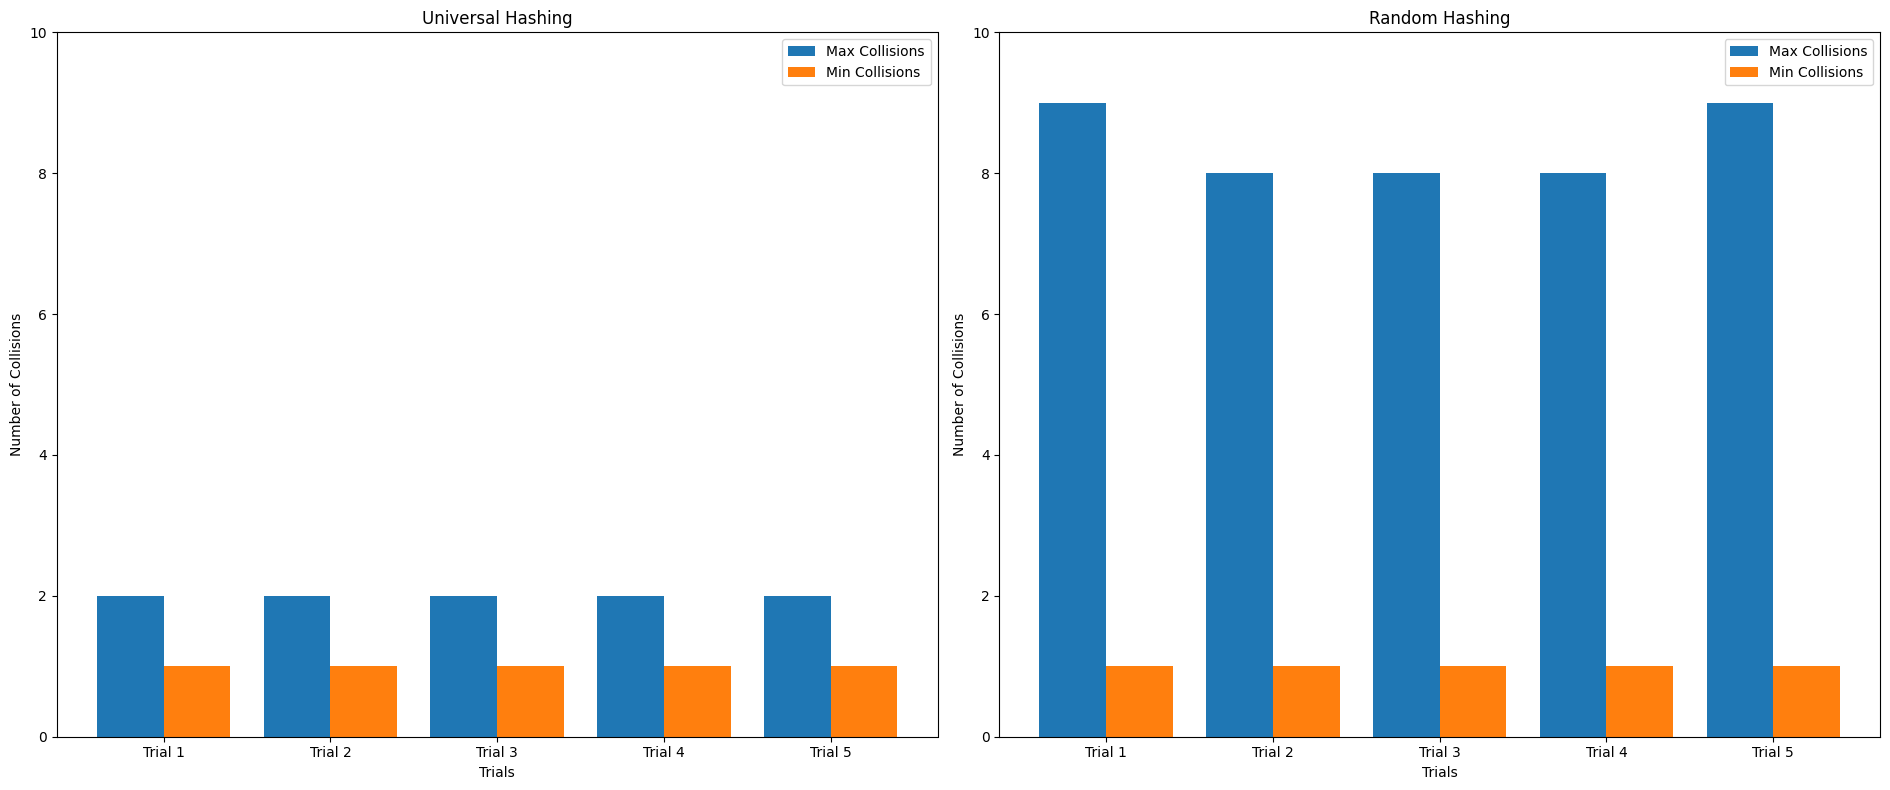

In [24]:
# plotting the results as bar graph to represent the number of collisions
# Universal Hash function max and min for all 5 iterations
univ_max, univ_min = zip(*univ)
rand_max, rand_min = zip(*rand)

x_labels = [f"Trial {i}" for i in range(1, 6)]
x = range(len(x_labels))
width = 0.4

fig, ax = plt.subplots(1, 2, figsize=(19, 8), sharex=True)

ax[0].bar([i - width/2 for i in x], univ_max, width, label="Max Collisions")
ax[0].bar([i + width/2 for i in x], univ_min, width, label="Min Collisions")
ax[0].set_title("Universal Hashing")
ax[0].set_ylabel("Number of Collisions")
ax[0].set_ylim(0, 10)
ax[0].set_xlabel("Trials")
ax[0].legend()

ax[1].bar([i - width/2 for i in x], rand_max, width, label="Max Collisions")
ax[1].bar([i + width/2 for i in x], rand_min, width, label="Min Collisions")
ax[1].set_title("Random Hashing")
ax[1].set_ylabel("Number of Collisions")
ax[1].set_ylim(0, 10)
ax[1].legend()

plt.xticks(x, x_labels)
plt.xlabel("Trials")

plt.tight_layout()
plt.show()

We see that for the universal hash function, the maximum and minimum number of collisions do not have a significant difference between them while for the random hash function, the maximum number of collisions is significantly higher than the minimum number of collisions. This is because the universal hash function is designed to minimize the number of collisions and uniformly distribute the keys across the hash table. The random hash function, on the other hand, is not deterministic and can result in a non-uniform distribution of keys across the hash table, leading to a higher number of collisions.

In [13]:
def trailing_zeros(n):
    """Count the number of trailing zeros in the binary representation of n."""
    if n == 0:
        return 0
    count = 0
    while n & 1 == 0:
        count += 1
        n >>= 1
    return count

In [18]:
def flajolet_martin(results, m=500000):
    univ_hash = HashTable(m)
    z = 0 # largest number of trailing zeros

    for result in results:
        res = univ_hash.hash(result)
        tz = trailing_zeros(res)
        z = max(z, tz)

    return 2 ** (z + 1/2)

In [29]:
flajolet_martin(results)

92681.90002368316

The total number of words in the words.txt file is `354986`. Flajolet Martin Algorithm is used to estimate the number of distinct words in the words.txt file. The estimate provided is anywhere n / 4 and 4 * n i.e. `88746.5` and `1419944`. This estimate can be strengthened using the median trick. The final estimate obtained above is `92682`.